## Problem
> In this assignment you will apply the concepts learn so far regarding python, numpy, matplotlib and pandas. In one of the class exercise we studied how to draw candlestick chart for three candle data. Candlestick charting is commonly used to understand stock market time series data and patterns within that data. In this assignment, you will download [SPY.CSV](./SPY.csv) file from Moodle and try to find following 3 candle patterns shown in diagrams within that data.

> 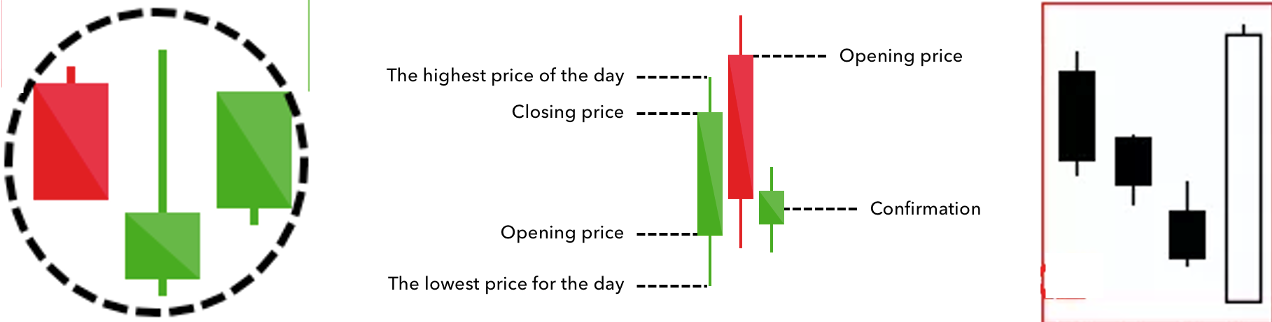

> Once these pattern is identified for for various date, save these three candles for drawing and verification. You should draw grid of three candle patterns as shown below as illustration. The example below shows organization of visualization by copying same pattern / date multiple time. In your case, you will have several different date patterns that looks like patterns shown above. You must also submit your approach for finding these patterns (data transformation, matching etc.). 
> 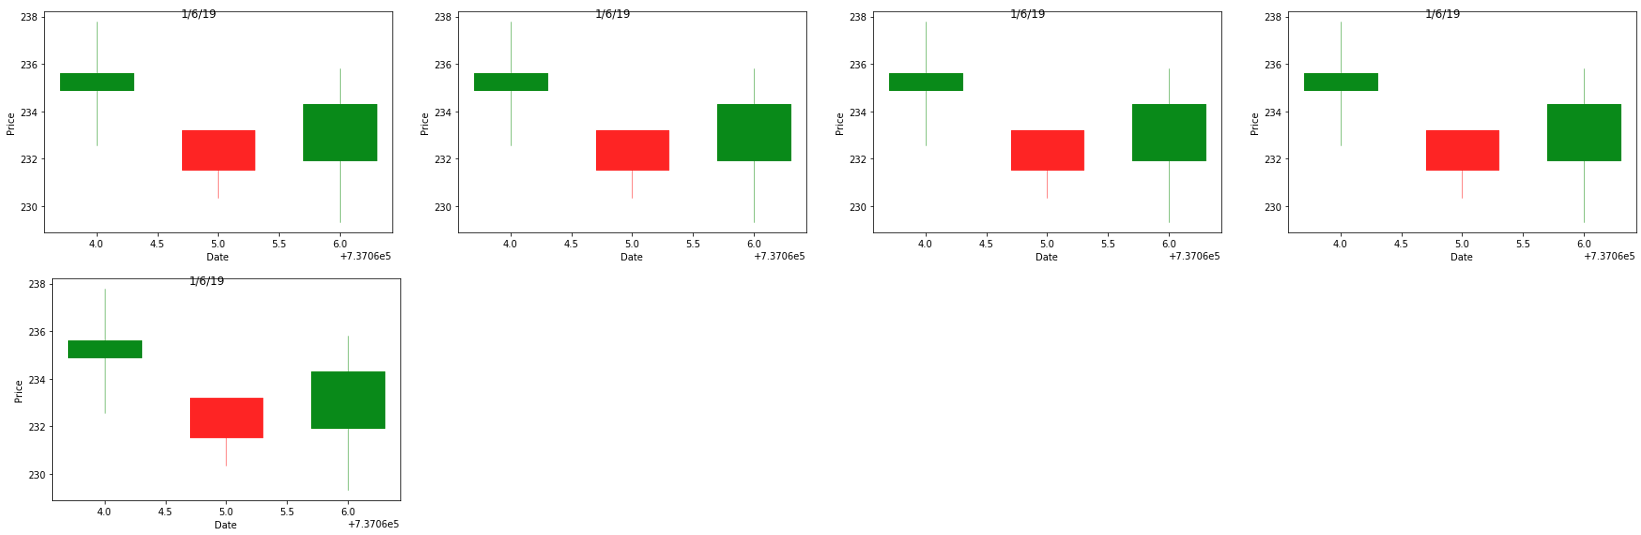

## My Answer

In [1]:
import os
import pandas as pd
import matplotlib as mp
import mplfinance as mpf

In [2]:
filename = "SPY.csv"
data = pd.read_csv(filename, index_col=0, parse_dates=True)

## show first 5 sample
data.head(5)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2017-07-26,247.75,247.79,247.13,247.43,44669097.0,0.0,1.0,247.75,247.79,247.13,247.43,44669097.0
2017-07-25,247.68,247.80,247.16,247.42,52685280.0,0.0,1.0,247.68,247.80,247.16,247.42,52685280.0
2017-07-24,246.79,246.98,246.28,246.82,44565029.0,0.0,1.0,246.79,246.98,246.28,246.82,44565029.0
2017-07-21,246.44,246.91,246.18,246.88,82340759.0,0.0,1.0,246.44,246.91,246.18,246.88,82340759.0
2017-07-20,247.28,247.42,246.47,247.10,43011325.0,0.0,1.0,247.28,247.42,246.47,247.10,43011325.0


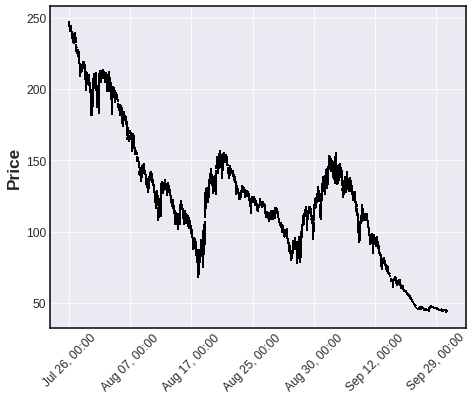

In [3]:
mpf.plot(data)

In [4]:
## use adjusted value only
d = data.loc[:, ['Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close']]
d.head(3)

,Adj_Open,Adj_High,Adj_Low,Adj_Close
Date,,,,
2017-07-26,247.75,247.79,247.13,247.43
2017-07-25,247.68,247.80,247.16,247.42
2017-07-24,246.79,246.98,246.28,246.82


In [5]:
data = d.rename(columns={'Adj_Open':'Open', 'Adj_High':'High', 'Adj_Low':'Low', 'Adj_Close':'Close'})
data.head(3)

,Open,High,Low,Close
Date,,,,
2017-07-26,247.75,247.79,247.13,247.43
2017-07-25,247.68,247.80,247.16,247.42
2017-07-24,246.79,246.98,246.28,246.82


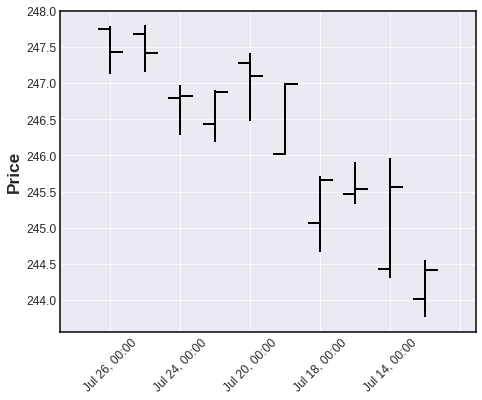

In [6]:
mpf.plot(data[0:10])

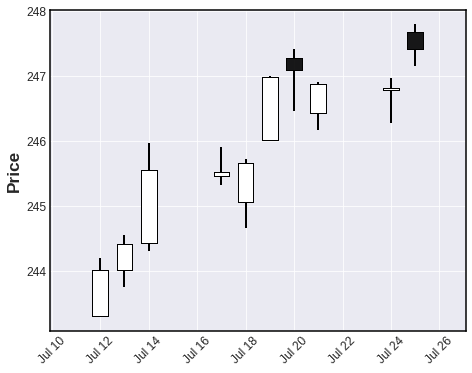

In [7]:
mpf.plot(data[10:0:-1], type='candle')

In [8]:
data=data[::-1].copy()
data.head(5)

,Open,High,Low,Close
Date,,,,
1993-01-29,27.465904,27.465904,27.328481,27.447165
1993-02-01,27.468630,27.643550,27.468630,27.643550
1993-02-02,27.624695,27.724648,27.568471,27.699660
1993-02-03,27.748979,28.017659,27.730234,27.998914
1993-02-04,28.092393,28.167356,28.036171,28.111134


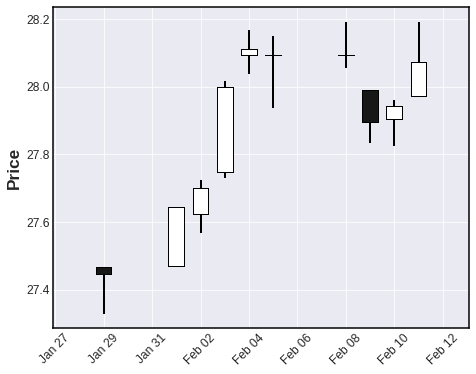

In [9]:
mpf.plot(data[0:10], type='candle')

In [10]:
def get_cell_from_DF(df, row_index, column_index):
    return df.iloc[row_index, column_index]

# test function
get_cell_from_DF(data, 0, 0)

27.46590429

### Analysis of the pattern
The search/match result is really dependent on how you interpret the pattern. 
* Is it a quantitative or qualitative pattern?
* Simple quantitative or complex quantitative?
* correlation?

Base on questions above, I divide it into serveral levels:
1. Only consider qualitative portraits for each candle 
  * close>open?
  
2. Consider simple quantitative portraits for each candle with high/low 
  * close>open?
  * high/low>open/close?
  
3. Consider simple qualitative portraits for each candle and their simple quantitative relationships (only adjacent open/close
  * close>open?
  * high/low>open/close?
  * first.open/close ? second.open/close, second.open/close ? third.open/close
  
4. Consider simple quantitative portraits for each candle and their simple quantitative relationships (only adjacent open/close/high/low)
  * close>open?
  * high/low>open/close?
  * first.open/close ? second.open/close, second.open/close ? third.open/close
  * first.high/low ? second.high/low, second.high/low ? third.high/low
  
5. Consider simple quantitative portraits for each candle and their simple quantitative relationships (interrelation open/close/high/low)
  * close>open?
  * high/low>open/close?
  * first.open/close ? second.open/close, second.open/close ? third.open/close
  * first.high/low ? second.high/low, second.high/low ? third.high/low
  * ...
  

In [11]:
def match_pattern(df, i1, i2, i3, level=1):
    # returned value
    is_matched = False
    
    # level=1
    
    ## first candle
    ### close < open
    is_matched = True if get_cell_from_DF(df, i1, 3) < get_cell_from_DF(df, i1, 0) else False
   
    ## second candle
    ### close > open
    is_matched = True if get_cell_from_DF(df, i2, 3) > get_cell_from_DF(df, i2, 0) else False
    
    ## third candle
    ### close > open
    is_matched = is_matched if get_cell_from_DF(df, i3, 3) > get_cell_from_DF(df, i3, 0) else False
    
    # level=2
    if level>=2:
        
        ## first candle
        ### close = low
        is_matched = is_matched if get_cell_from_DF(df, i1, 3) == get_cell_from_DF(df, i1, 2) else False
        ### open  < high
        is_matched = is_matched if get_cell_from_DF(df, i1, 0) < get_cell_from_DF(df, i1, 1) else False

        ## second candle
        ### open > low
        is_matched = is_matched if get_cell_from_DF(df, i2, 0) > get_cell_from_DF(df, i2, 2) else False
        ### close < high
        is_matched = is_matched if get_cell_from_DF(df, i2, 3) < get_cell_from_DF(df, i2, 1) else False

        ## third candle
        ### open > low
        is_matched = is_matched if get_cell_from_DF(df, i3, 0) > get_cell_from_DF(df, i3, 2) else False
        #3# close = high 
        is_matched = is_matched if get_cell_from_DF(df, i3, 3) == get_cell_from_DF(df, i3, 1) else False
    
    # level=3
    if level>=3:
        ## second.close < first.close
        is_matched = is_matched if get_cell_from_DF(df, i2, 3) < get_cell_from_DF(df, i1, 3) else False
        ## second.close < third.open
        is_matched = is_matched if get_cell_from_DF(df, i2, 3) < get_cell_from_DF(df, i3, 0) else False
        
    # level>=4
    if level>=4:
        pass
    
    return is_matched



In [12]:
# test function match_pattern()
data.head(4)

,Open,High,Low,Close
Date,,,,
1993-01-29,27.465904,27.465904,27.328481,27.447165
1993-02-01,27.468630,27.643550,27.468630,27.643550
1993-02-02,27.624695,27.724648,27.568471,27.699660
1993-02-03,27.748979,28.017659,27.730234,27.998914


In [13]:
match_pattern(data, 0,1,2)

True

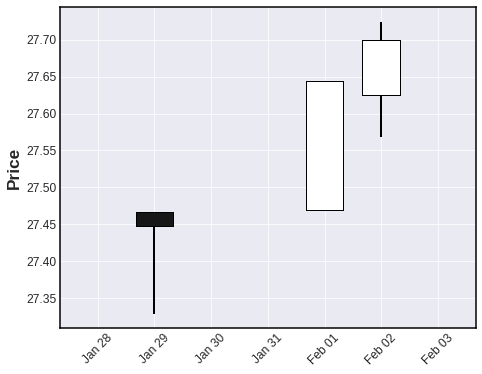

In [14]:
mpf.plot(data[0:3], type="candle")

In [15]:
match_pattern(data, 0,1,2, level=2)

False

In [18]:
# find the first pattern
data.shape

(6169, 4)

In [19]:
len(data)

6169

In [21]:
for i in range(1,5,1):
    print(i)

1
2
3
4


In [23]:
window_size = 3
stride = 1
offset = window_size // 2
print(offset)

1


In [43]:
# index list stores index of all candles matching the pattern
index_list = list()
for i in range(offset, len(data)-offset, stride):
    if match_pattern(data, i-1, i, i+1, level=2):
        index_list.extend([i-1, i, i+1])
        
        

In [44]:
# total matched groups
len(index_list)/3

7.0

In [46]:
index_list = list(set(index_list))
print(index_list)
index_list.sort()
print(index_list)

[1158, 1159, 1160, 911, 912, 913, 1054, 1055, 928, 929, 930, 1056, 1061, 1062, 1063, 1349, 1350, 1351, 991, 992, 993]
[911, 912, 913, 928, 929, 930, 991, 992, 993, 1054, 1055, 1056, 1061, 1062, 1063, 1158, 1159, 1160, 1349, 1350, 1351]


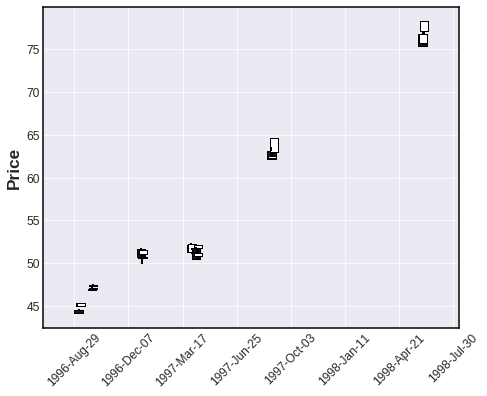

In [47]:
# visuualize those matched groups
mpf.plot(data.iloc[index_list, :], type="candle")